In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

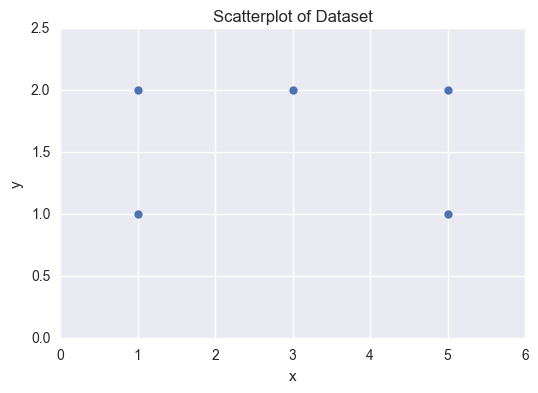

In [378]:
x = [1,3,5,1,5]
y = [2,2,2,1,1]

plt.plot(x,y, 'o', markersize=6)
plt.ylim(0,2.5)
plt.xlim(0, 6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of Dataset')
plt.show()

### K-Means

In [446]:
class k_means:
    def __init__(self, x, y, k, initialization=None):
        self.x = x
        self.y = y
        self.data = np.array(list(zip(x,y)))
        self.k = k
        self.start = np.vstack(initialization) if initialization else None
        self.centroids_history = list()
        
    def initialize(self):
        '''
        In case no starting clusters are specified by the user, 
        k distinct points from the dataset are choosen 
        randomly as cluster centroids.
        '''
        
        if type(self.start) is type(None):
            from random import randint
            rand = []
            length = len(self.x)
            for n in range(self.k):
                index = randint(0, length - 1)
                
                # make sure we haven't already
                # picked this point
                if index in rand:
                    while(index in rand):
                        index = randint(0,length-1)
                
                rand.append(index)
                
            self.start = np.vstack([self.data[k] for k in rand])

        self.centroids_history.append(self.start)
            
    
    def kmeans(self, verbose = False):
        if self.k > len(self.x):
            return "Error: k > #(data points). Goodbye."
        # initialize first
        self.initialize()
        
        # remember previous centroid of each iteration
        # will be needed to terminate the algorithm 
        old_centroids = self.start
        new_centroids = self.mapping(old_centroids, verbose)
        if verbose:
            print("After first mapping, new centroids:")
            print(new_centroids)
        if(not np.array_equal(new_centroids, old_centroids)):
            equal = False
            count = 0
            while not equal and count < 250:
#                print('New centroid within loop')
#                print(new_centroids)
                old_centroids = new_centroids.copy()
                new_centroids = self.mapping(old_centroids,verbose)
#                print("New calculated centriods within loop:")
#                print(new_centroids)
                
                # stop when there is no more change
                equal = np.array_equal(old_centroids,new_centroids)
#                print(equal)
                count += 1
        
        # pop last result cuz it's been added twice
        # (during the last two iterations of while loop)
        self.centroids_history.pop(-1)

            
        
        
    def mapping(self, old_centroids,verbose):
        # create hash-map to store 
        # data points which were 
        # assigned to a specific centroid
        assignment = [list() for n in range(self.k)]
        
        # create var to store
        # new centroids later 
        new_centroids = old_centroids.copy()
#        print("Before calculation")
#        print(new_centroids)
        for data_point in self.data:
            dist = []
#            print("distance between")
            for centroid in new_centroids:
#                print(data_point, centroid)
                dist.append(np.linalg.norm(centroid - data_point))
#            print("dist: ", dist)
            assignment[np.argmin(dist)].append(data_point)
            
#        print("Assignment looks like: ", assignment)
        if verbose:
            print("Computing new centroids:")
        result=[]
        for n in range(self.k):
#            print(assignment[n])
#            print(np.mean(assignment[n], axis=0))
            result.append(np.mean(assignment[n], axis=0))
        
        if verbose:
            print("Retruning newly computed centroids:")
            print(result)
        
        # save result for plotting 
        self.centroids_history.append(np.vstack(result))
        return result
    
    def visualize(self):
        x, y = self.x, self.y
        min_x = np.amin(a.start,axis=0)[0]
        max_x = np.amax(a.start, axis=0)[0]

        min_y = np.amin(a.start, axis=0)[1]
        max_y = np.amax(a.start, axis=0)[1]
        
        min_x = min(min_x, min(x))
        max_x = max(max_x, max(x))
        
        
        min_y = min(min_y, min(y))
        max_y = max(max_y, max(y))
        
        colors = ['b','g','r','c','m','y','k','w']
        plt.plot(x,y, 'o', markersize=6)
        plt.ylim(min_y-1,max_y+1)
        plt.xlim(min_x-1, max_x+1)
        
        size = 7
        for centroids in self.centroids_history:
            size += size*0.25
            for i in range(self.k):
                plt.plot(centroids[i][0], centroids[i][1], '*', 
                         markersize=size, color="{}".format(colors[i]))
        
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Scatterplot of Dataset')

        plt.show()
            

x = [1,3,1]
y = [1,2,2]

In [438]:
tst = k_means(x, y, 2)
print(tst.initialize(), tst.start)
tst.kmeans()

None [[1 2]
 [3 2]]


[array([ 1. ,  1.5]), array([ 4.33333333,  1.66666667])]

In [439]:
tst.centroids_history

[array([[1, 2],
        [3, 2]]), array([[1, 2],
        [3, 2]]), array([[ 1.        ,  1.5       ],
        [ 4.33333333,  1.66666667]])]

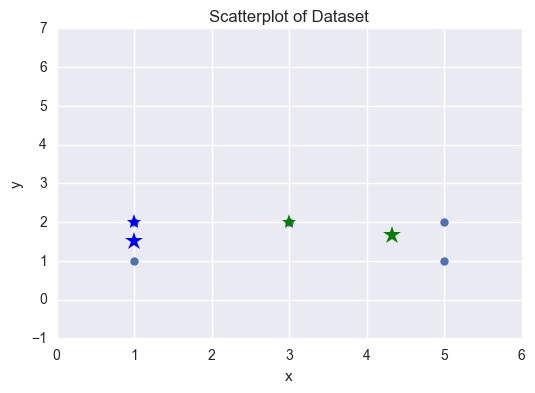

In [441]:
tst.visualize()

### Assignment 5.2
### a) Initialization of k-Means Algorithm = $C_1(1,0)$ and $C_2(5,6)$

In [447]:
x = [1,3,5,1,5]
y = [2,2,2,1,1]

a = k_means(x,y,k=2, initialization=[[1,0], [5,6]])

In [448]:
a.kmeans()

In [449]:
a.centroids_history

[array([[1, 0],
        [5, 6]]), array([[ 2.5,  1.5],
        [ 5. ,  2. ]]), array([[ 1.66666667,  1.66666667],
        [ 5.        ,  1.5       ]])]

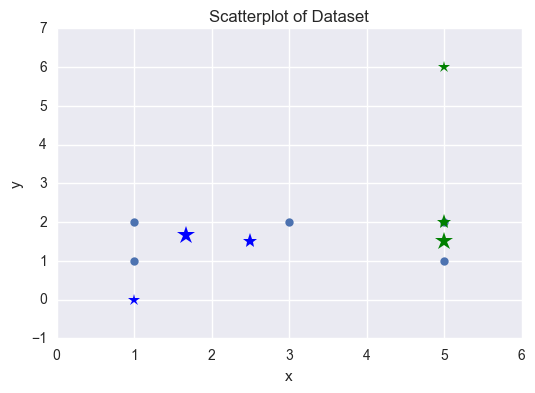

In [450]:
a.visualize()

### b) Initialization of k-Means Algorithm = $C_1(2.75,3)$ and $C_2(3.25,0)$

In [453]:
b = k_means(x, y, k=2, initialization=[[2.75, 3], [3.25,0]])
b.kmeans()
b.centroids_history

[array([[ 2.75,  3.  ],
        [ 3.25,  0.  ]]), array([[ 3.,  2.],
        [ 3.,  1.]])]

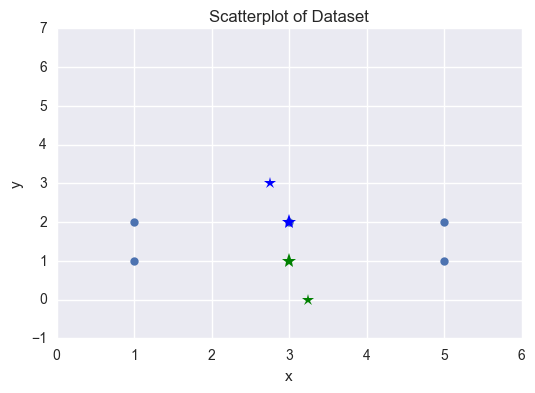

In [452]:
b.visualize()

#### Further tests, just out of curiousness

#### k = 5

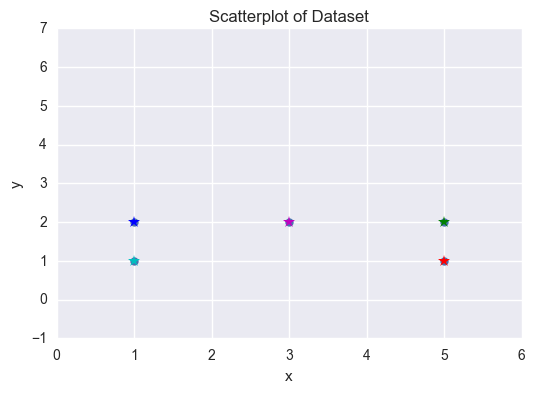

In [454]:
fun = k_means(x, y, k=5)
fun.kmeans()
fun.visualize()

    each data point ends up as a cluster

#### k = 6

In [455]:
fun = k_means(x,y,k=6)
fun.kmeans()

'Error: k > #(data points). Goodbye.'

#### k = 3

Computing new centroids:
Retruning newly computed centroids:
[array([ 1. ,  1.5]), array([ 3.,  2.]), array([ 5. ,  1.5])]
After first mapping, new centroids:
[array([ 1. ,  1.5]), array([ 3.,  2.]), array([ 5. ,  1.5])]
Computing new centroids:
Retruning newly computed centroids:
[array([ 1. ,  1.5]), array([ 3.,  2.]), array([ 5. ,  1.5])]


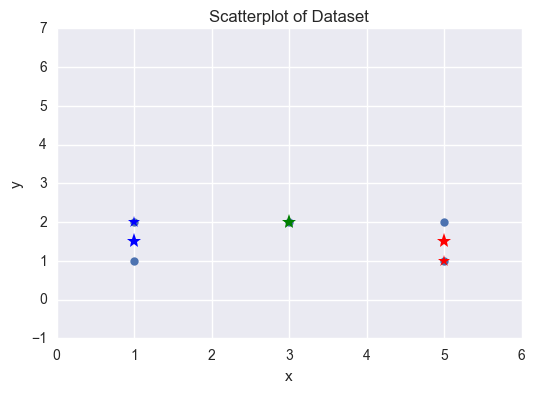

In [456]:
fun = k_means(x,y,k=3)
fun.kmeans(verbose=True)
fun.visualize()

#### k = 4

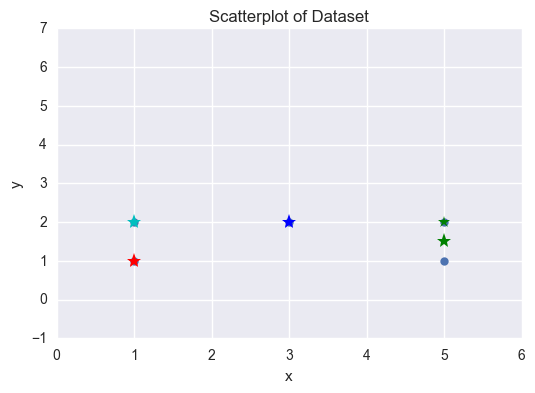

In [437]:
fun = k_means(x,y, k=4)
fun.kmeans()
fun.visualize()

## Compare to outcome of scikit-learn k-Means

Labels: 
[0 0 1 0 1]


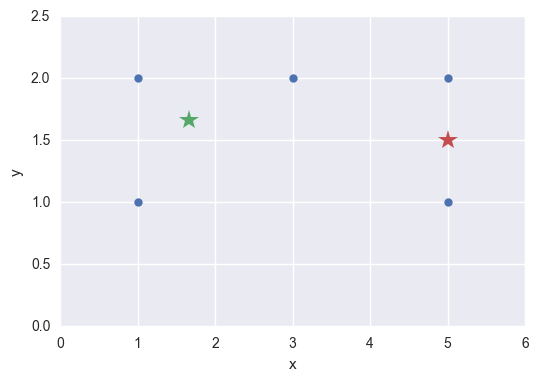

In [443]:
from sklearn.cluster import KMeans

X = np.array(list(zip(x,y)))
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print("Labels: ")
print(kmeans.labels_)

c1 = kmeans.cluster_centers_[0]
c2 = kmeans.cluster_centers_[1]

plt.plot(x,y, 'o', markersize=6)
plt.plot(c1[0], c1[1], '*', markersize=15)
plt.plot(c2[0], c2[1], '*', markersize=15)
plt.ylim(0,2.5)
plt.xlim(0, 6)
plt.xlabel('x')
plt.ylabel('y')
plt.show()